###Introduction :
Gender is a social construction. The way men and women are treated differently since birth, shapes their behavior and personal preferences into what society expects only by looking at their gender.Both genders have different face structure.


###Objective:
Predict the classification of certain facial features based on the provided dataset's seven features. Develop a model to determine whether an individual possesses long hair, a wide nose, a long nose, and thin lips.
Try to Build model.



### Dataset link:
 https://www.kaggle.com/code/ahmedklabi/gender-class-randomforest/input


###Details about the dataset:

    This dataset contains 7 features and a label column.
    longhair -     This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
    foreheadwidthcm -  This column is in CM's. This is the width of the forehead.
    foreheadheightcm - This is the height of the forehead and it's in Cm's.
    nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
    noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
    lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
    distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [ ]:
df = pd.read_csv("/content/gender_classification_v7.csv")


In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


**mapping male=0 amd female=1**

In [ ]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

**Visualizing the plot using scatterplot**

<Axes: xlabel='long_hair', ylabel='lips_thin'>

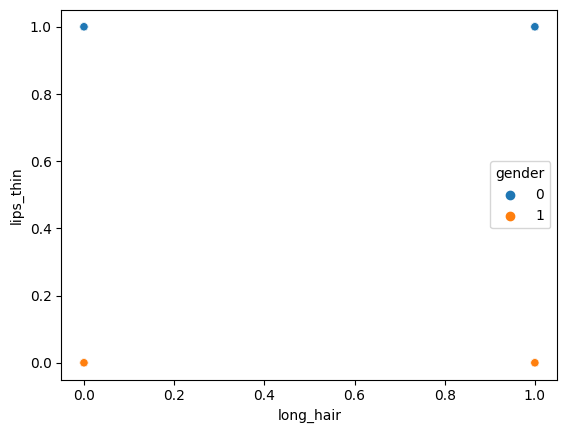

In [ ]:
sns.scatterplot(data=df,x='long_hair',y='lips_thin',hue='gender') #it is clearly visible that it is linearly seperable data

**information over the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


**countplot for the male and female**

<Axes: xlabel='gender', ylabel='count'>

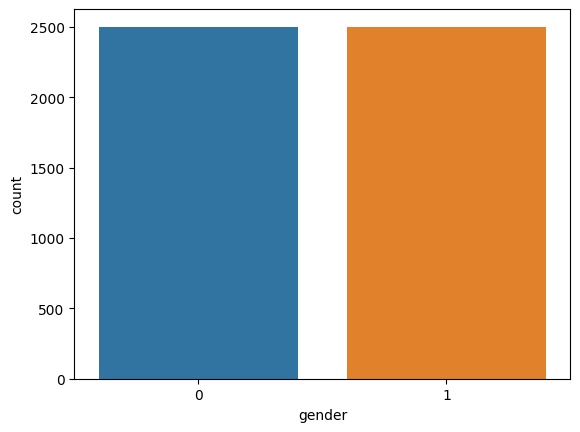

In [ ]:
sns.countplot(data=df,x='gender')

In [ ]:
x = df.drop('gender',axis=1)
y = df['gender']

**training and test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

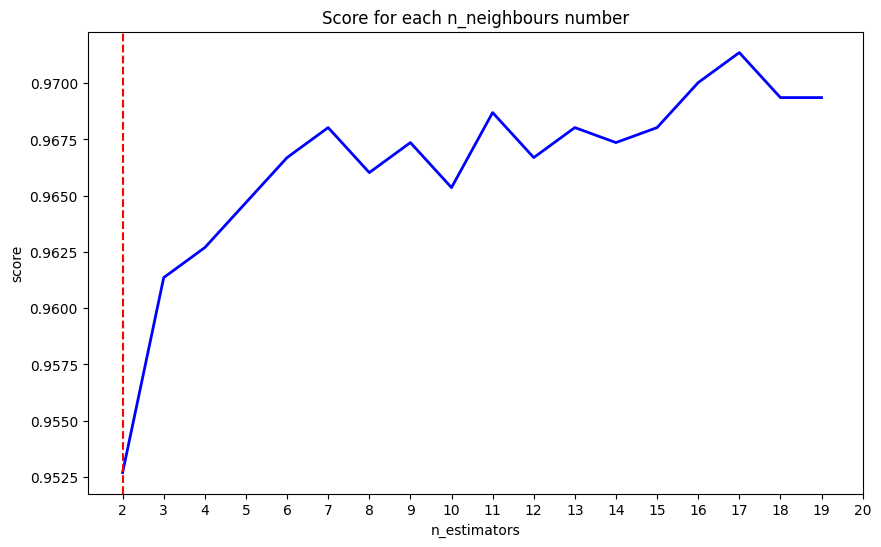

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# tim n_neighbors
score_total=[]
for i in range(2,20,1):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train, y_train)
  score = model_knn.score(x_test, y_test)
  score_total.append([score])
plt.figure(figsize=(10,6))
plt.title('Score for each n_neighbours number')
plt.plot(range(2,20,1), score_total, linewidth=2, color='blue')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(2,21,1))
plt.axvline(x=2, color='r', linestyle='--')
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train,y_train)
y_pred=model_knn.predict(x_test)
accuracy1 =  accuracy_score(y_train, model_knn.predict(x_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, model_knn.predict(x_test))
print("Test acc: %.2f" % accuracy2)

print(classification_report(y_test, y_pred))

Train acc: 0.98
Test acc: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       759
           1       0.97      0.93      0.95       742

    accuracy                           0.95      1501
   macro avg       0.95      0.95      0.95      1501
weighted avg       0.95      0.95      0.95      1501



In [ ]:
# Try to this in SVM
#code Sample
#**importing support vector machine for classification**
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
prediction = svc.predict(x_test)

#**evaluating performance**

from sklearn.metrics import accuracy_score , classification_report

accuracy_score(y_test,prediction)

print(classification_report(y_test,prediction))